**Lab 5**

In this lab we will be exploring simulated data for the Large Hadron Collider, Specifically a simulated background data set (QCD) and a simulated data of a higgs decay via bottom quark antiquark mode. we will be working with a slice of data with transverse momentum of 100-1200. Our data has 13 columns of jet kinematic data and each row is one simulated jet. 

The data is all in natural units with energy, mass and momentum all being in GeV

Pt is the transverse momentum of a jet, hence the moment that is in the direction parallel to the particle beam axis, 

Eta is the pseudrapidity ranging form -2.5 to 2.5 measured along the beam axis by $-ln[tan(\theta /2)]$ with theta being the angel between the momentum of the particle and the beam axis, this gives us a relationship between the three momentum and the transverse momentum.

We mass measured in Gev

And then two rows with the energy correlators ee2 and ee3, these are the energy correlations between two and three adjacent jets respectively. 

Then we have d2 the two prong jet discriminant which is calculated from ee2 and ee3 by d2 = ee2/ee3**3 giving us a way to get a numerical value to be able to make predictions of whether jets came from the same event.

The angularity is a continuous number that describes the shape of the jet.

Then we have three subjettiness measurements t_n they can be thought of as the variance or spread of the detections of events if we take n number of braches coming from a jet, we then use these number to calculate ratios of the three values (t_21 and t_32) such that t_ij = t_i/t_j

finally, we have KtDeltaR which is a measurement of the difference in size of two subjets

Now let’s explore the data with some graphs, we expect to see distinction between the background QCD and the higgs data for all the columns expect for the theta. And we expect that distribution to be that the higgs data will be sharper/more closely centered around a value

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,3)

In [3]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)


higgsData = pd.DataFrame(new_dict)
# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)

qcdData = pd.DataFrame(new_dict)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [5]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
 print(new_dict['mass'][i],new_dict['d2'][i])


272.01088105661836 3.244342529835572
139.7944080424717 6.481473283811561
245.4131462450914 2.6347878568119545
89.97591625467423 13.389844946183699
85.89395606420216 11.342156212232954
298.82680391098984 2.525105538419591
120.11684917359369 3.0180758748270313
144.69776811306357 7.180292494621935
99.67094594080851 7.004058591448358
246.64401978773606 1.2917788826098395


In [6]:
higgsData.head(4)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328


<function matplotlib.pyplot.show(*args, **kw)>

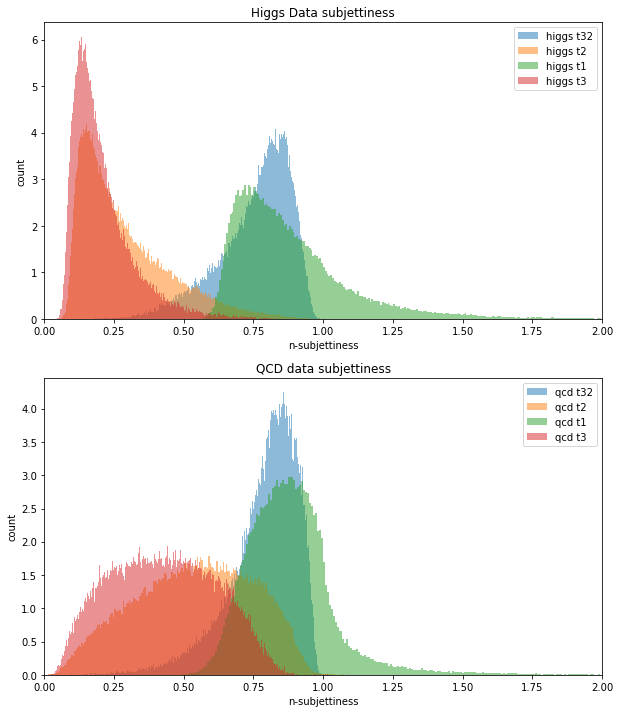

In [19]:
plt.rcParams["figure.figsize"] = (10,12)
plt.subplot(211)
plt.hist(higgsData['t32'], bins=500, density= True,label ='higgs t32',alpha=0.5)
plt.show
plt.hist(higgsData['t2'], bins=500, density= True,label ='higgs t2',alpha=0.5)
plt.show
plt.hist(higgsData['t1'], bins=500, density= True,label ='higgs t1',alpha=0.5)
plt.show
plt.hist(higgsData['t3'], bins=500, density= True,label ='higgs t3',alpha=0.5)

plt.legend()
plt.xlim([0,2])
plt.ylabel('count')
plt.xlabel('n-subjettiness')
plt.title('Higgs Data subjettiness')
plt.show

plt.subplot(212)
plt.hist(qcdData['t32'], bins=500, density= True,label ='qcd t32',alpha=0.5)
plt.show
plt.hist(qcdData['t2'], bins=500, density= True,label ='qcd t2',alpha=0.5)
plt.show
plt.hist(qcdData['t1'], bins=500, density= True,label ='qcd t1',alpha=0.5)
plt.show
plt.hist(qcdData['t3'], bins=500, density= True,label ='qcd t3',alpha=0.5)

plt.legend()
plt.ylabel('count')
plt.xlabel('n-subjettiness')
plt.title('QCD data subjettiness')
plt.xlim([0,2])
plt.show

Here we see that the background data is smoother as expected

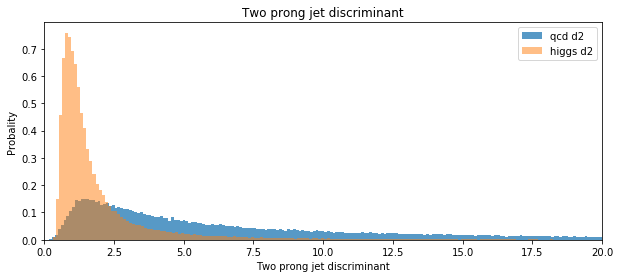

In [25]:
plt.rcParams["figure.figsize"] = (10,4)
plt.hist(qcdData['d2'], bins=5000, density= True,label ='qcd d2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.title('Two prong jet discriminant')
plt.hist(higgsData['d2'], bins=500, density= True,label ='higgs d2',alpha=0.5)
plt.show
plt.xlabel('Two prong jet discriminant')
plt.xlim([0,20])
plt.ylabel('Probability')
plt.legend()

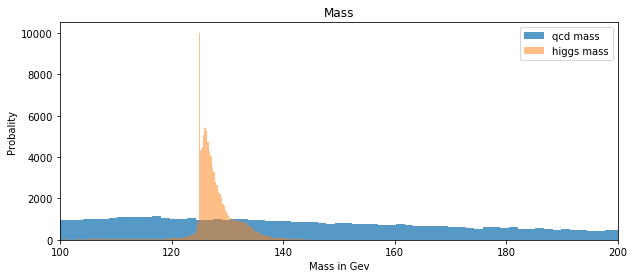

In [33]:
plt.hist(qcdData['mass'], bins=500, density= False,label ='qcd mass',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['mass'], bins=500, density= False,label ='higgs mass',alpha=0.5)
plt.show
plt.title('Mass')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')
plt.xlim([100,200])
plt.legend()

We see a very even distribution for the background but a very sharp peak of the Higgs mass, which makes sense

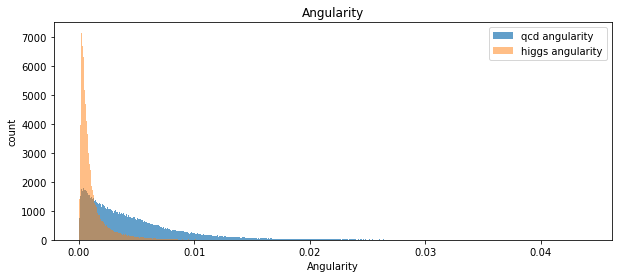

In [32]:
plt.hist(qcdData['angularity'], bins=500, density= False,label ='qcd angularity',alpha=0.7)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['angularity'], bins=500, density= False,label ='higgs angularity',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('Angularity')
plt.title('Angularity')
plt.legend()

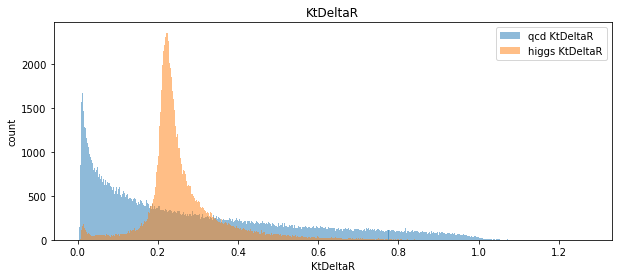

In [31]:
plt.hist(qcdData['KtDeltaR'], bins=500, density= False,label ='qcd KtDeltaR',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['KtDeltaR'], bins=500, density= False,label ='higgs KtDeltaR',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')
#plt.xlim([0,20])
plt.legend()

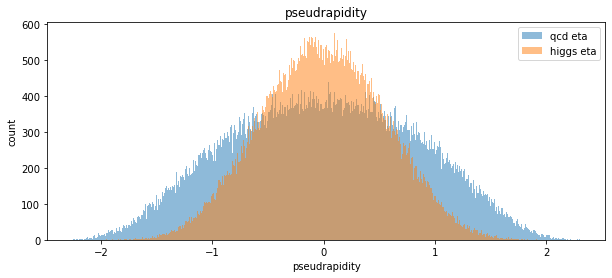

In [36]:
plt.hist(qcdData['eta'], bins=500, density= False,label ='qcd eta',alpha=0.5)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['eta'], bins=500, density= False,label ='higgs eta',alpha=0.5)
plt.show
plt.ylabel('count')
plt.xlabel('pseudrapidity')
plt.title('pseudrapidity')
#plt.xlim([0,20])
plt.legend()


Text(0.5, 1.0, 'energy correlator 2')

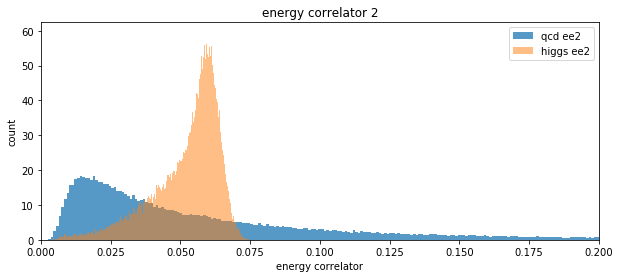

In [39]:
plt.hist(qcdData['ee2'], bins=500, density= True,label ='qcd ee2',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['ee2'], bins=500, density= True,label ='higgs ee2',alpha=0.5)
plt.show
plt.xlim([0,0.20])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 2')


Text(0.5, 1.0, 'energy correlator 3')

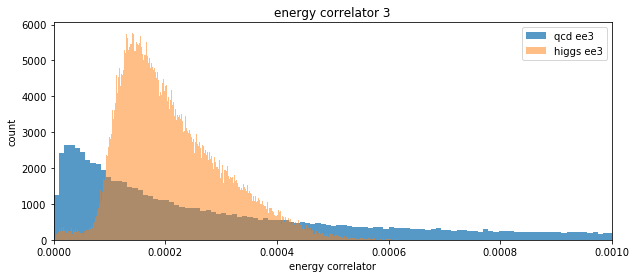

In [40]:
plt.hist(qcdData['ee3'], bins=10000, density= True,label ='qcd ee3',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['ee3'], bins=500, density= True,label ='higgs ee3',alpha=0.5)
plt.show
plt.xlim([0,0.0010])
plt.legend()
plt.ylabel('count')
plt.xlabel('energy correlator')
plt.title('energy correlator 3')

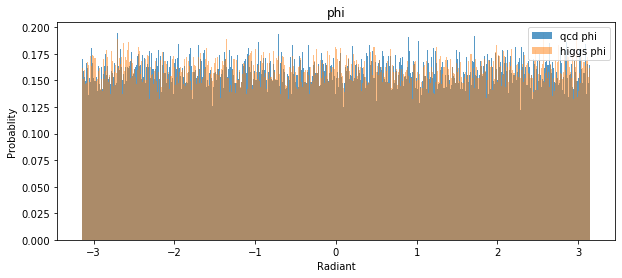

In [42]:
plt.hist(qcdData['phi'], bins=500, density= True,label ='qcd phi',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['phi'], bins=500, density= True,label ='higgs phi',alpha=0.5)
plt.show
plt.ylabel('Probablity')
plt.title('phi')
plt.xlabel('Radiants')
#plt.xlim([900,1290])
plt.legend()

As expected the phi doesn’t have a pattern, we would expect to see jets having an azimuthal symmetry

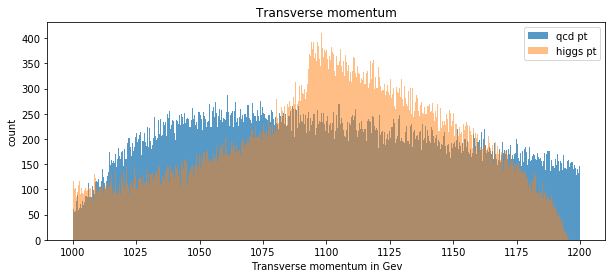

In [41]:
plt.hist(qcdData['pt'], bins=500, density= False,label ='qcd pt',alpha=0.75)
plt.show
#plt.xlim([0,20])
plt.legend()
plt.hist(higgsData['pt'], bins=500, density= False,label ='higgs pt',alpha=0.5)
plt.show
#plt.xlim([900,1290])
plt.ylabel('count')
plt.title('Transverse momentum')
plt.xlabel('Transverse momentum in Gev')
plt.legend()


This data has sharp a cut off on each side due to the data being slices to only include pt values of 1000-1200 GeV